# Map_Multiple_GeoJSON_Points

When mapping points, lines, and polygons, the data we use is accessed from a URL because this data is usually inaccessible for download or maybe too large to store on your computer and add as an external file.

Download the majorAirports.json file and put it on the Mapping_Earthquakes repository.

Download majorAirports.json 

Using the URL for the majorAirports.json file in your GitHub repository, we'll add multiple points onto a map.

When you click on the majorAirports.json file on GitHub, you should see an OpenStreetMap populated with major airports. Our map will look similar to this after we are done.



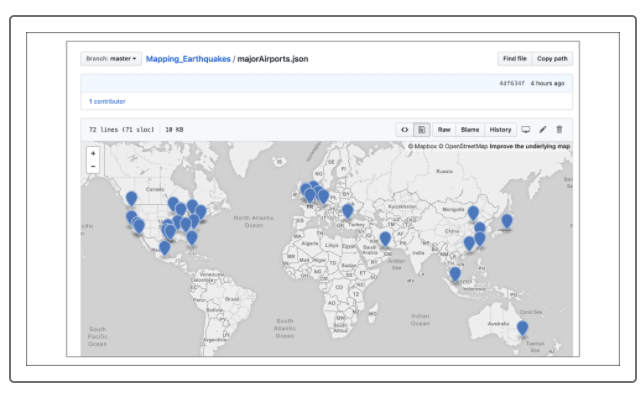


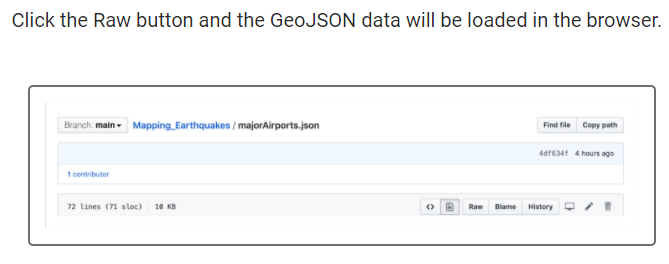

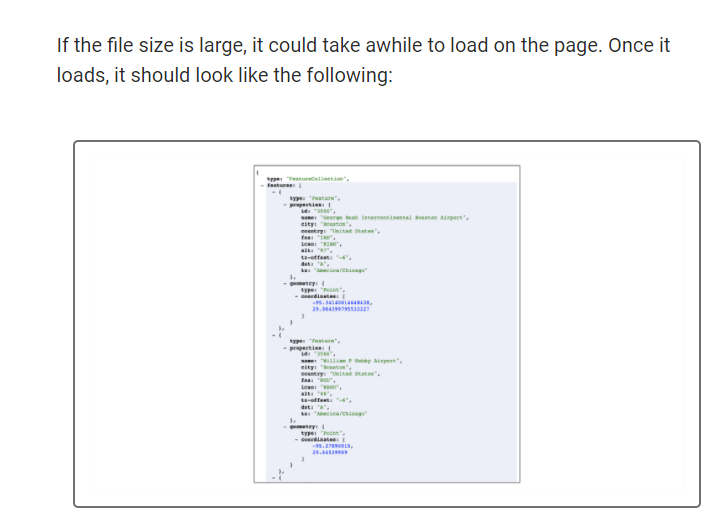

To begin adding the data to the map, first we need to read the external majorAirports.json file.

### REWIND
To read an external .json file, we need to use the d3.json() method. To use the d3.json() method, we need to have the <script src="https://d3js.org/d3.v5.min.js"></script> file in the index.html page.

Open the index.html file, and in the <head> section above the CSS link, add the following D3.js library file script:

In [ ]:
<!-- d3 JavaScript -->
<script src="https://d3js.org/d3.v5.min.js"></script>

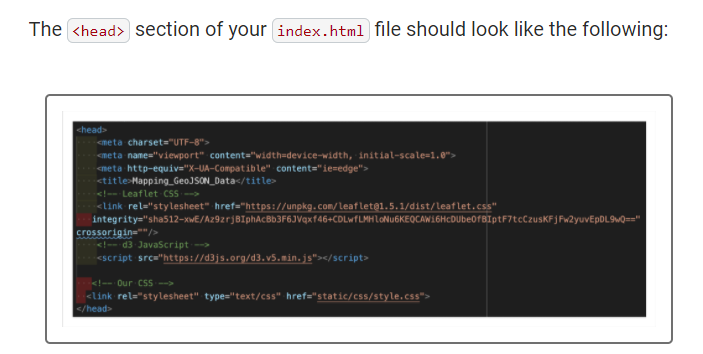

Next, we'll edit the logic.js file.

Change the geographical center of the map to the geographical center of the Earth and set the zoom level as follows:

In [ ]:
// Create the map object with center and zoom level.
let map = L.map('mapid').setView([30, 30], 2);

Next, we'll access the majorAirports.json file on GitHub with the following airportData variable. Your URL may be different, but it should begin with https://raw.githubusercontent.com.

Add the following code after your tileLayer() method:

// Accessing the airport GeoJSON URL
let airportData = "https://raw.githubusercontent.com/<GitHub_name>/Mapping_Earthquakes/main/majorAirports.json";

### NOTE
Having the tileLayer() method before accessing large datasets ensures that the map gets loaded before the data is added to it.

Next, we'll add the d3.json() method, which returns a promise with the then() method and the anonymous function().

Inside the d3.json() method we'll add the airportData variable.

Inside the anonymous function() we'll add the data parameter, which references the airportData.

We'll pass this data to the L.geoJSON() layer and then it'll be added to the map with addTo(map).

In [ ]:
// Grabbing our GeoJSON data.
d3.json(airportData).then(function(data) {
    console.log(data);
  // Creating a GeoJSON layer with the retrieved data.
  L.geoJson(data).addTo(map);
});

Your logic.js file should look like the following:

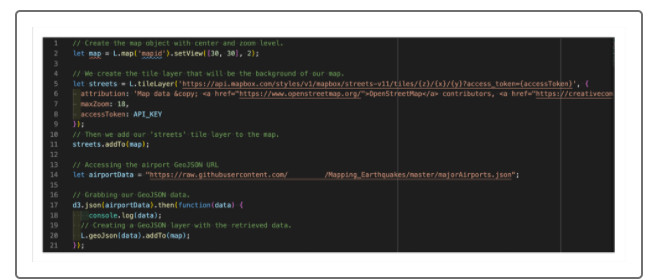

Let's see how our map looks now. Open your index.html file in your browser using the command python -m http.server—just to be sure that the data is accessible through the Python server.

Your map should look like the following:

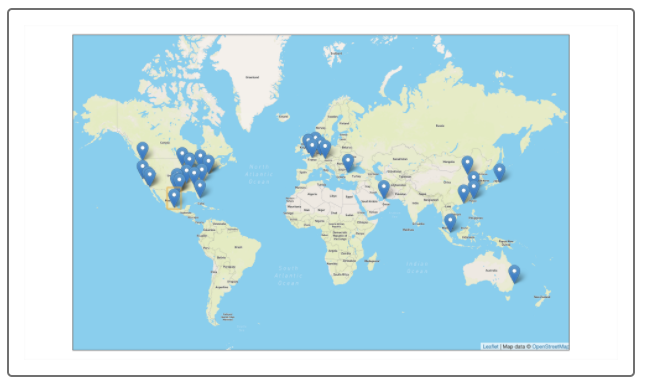

## Add Multiple Maps
Adding another map to showcase the data is a nice feature for a map. Most mobile apps with a mapping service use two different styles, or layers: a satellite layer and a dark layer. This makes the app visually appealing and brings functionality to the map.

To create two map choices, we'll edit the logic.js file for mapping the major airports without the popup markers. We'll move some code to make it more readable, and we'll add more code to the logic.js file.

To add another map, we'll use the Leaflet Layers Control. The Layers Control allows us to control which layers, or styles, we'll see on our map. For this task, we'll work with the streets and dark layers.

First, we'll add another tileLayer() to create a dark map. If you don't have the tileLayer() code for the dark map, add the following code block below the code for the streets map.

In [ ]:
// We create the dark view tile layer that will be an option for our map.
let dark = L.tileLayer('https://api.mapbox.com/styles/v1/mapbox/dark-v10/tiles/{z}/{x}/{y}?access_token={accessToken}', {
attribution: 'Map data © <a href="https://www.openstreetmap.org/">OpenStreetMap</a> contributors, <a href="https://creativecommons.org/licenses/by-sa/2.0/">CC-BY-SA</a>, Imagery (c) <a href="https://www.mapbox.com/">Mapbox</a>',
    maxZoom: 18,
    accessToken: API_KEY
});

Don't add the addTo(map) at the end of your streets or dark tileLayer() code. We'll add it later.

At this point, your logic.js file should look like the following:



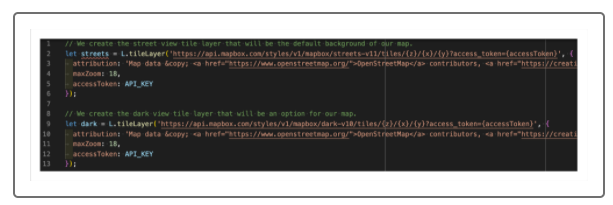

Next, we'll add both map variables to a new variable, baseMaps. This variable will be used as our base layer, which we'll reference later.

After the code for the dark map, add the following variable to reference the base layer:

In [ ]:
// Create a base layer that holds both maps.
let baseMaps = {
  Street: streets,
  Dark: dark
};

In the base layer code, the Street and Dark keys set the text, which we'll see in the index.html file, while the corresponding values reference the tile layers. Street and Dark can be used to toggle between styles in the index.html file and will look like the following: 

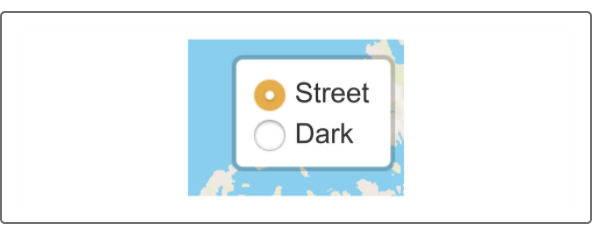

Modify the map object to change the center and zoom level, and add the base layer with the default map. For the map object, we won't use the setView() method; instead, we'll apply the alternative method that we used earlier in this module.

### REWIND
An alternative to using the setView()method is to modify each attribute in the map object using the curly braces notation as follows:

In [ ]:
braces notation as follows:

// Create the map object with a center and zoom level.
let map = L.map("mapid", {
  center: [40.7, -94.5],
  zoom: 4
});

Add the following code after the base layer code:

In [ ]:
// Create the map object with center, zoom level and default layer.
let map = L.map('mapid', {
    center: [30, 30],
    zoom: 2,
    layers: [streets]
})

To complete the code for the map layers, use the Leaflet control.layers, which will control the layers we'll see on the map. Add the following code below the map object:

In [ ]:
// Pass our map layers into our layers control and add the layers control to the map.
L.control.layers(baseMaps).addTo(map);

When creating the Layers Control, the argument passed, baseMaps, is the base layer object, which will allow the two different map styles to be shown on the index.html file. The Layers Control will look like the following before it is clicked to show the Street and Dark options:

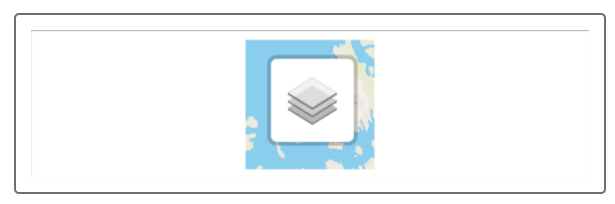

Your logic.js file should look like the following:



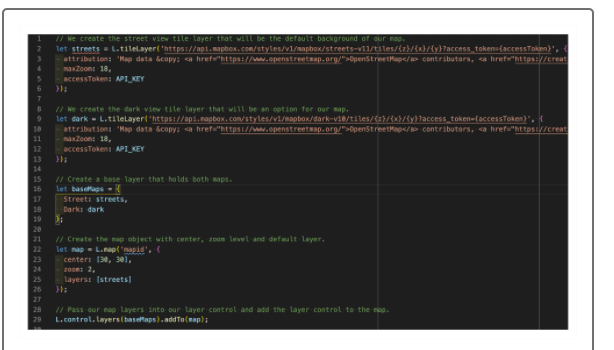

Finally, add the airportData variable to the d3.json() method as shown below:

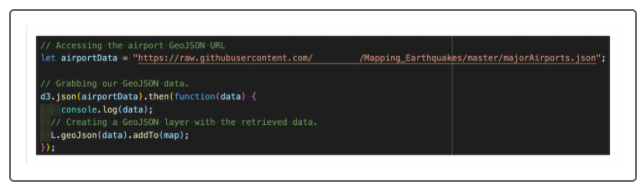

Save the logic.js file and open index.html in your browser. Your map should look like the following with a Layers Control in the top right corner of the map:

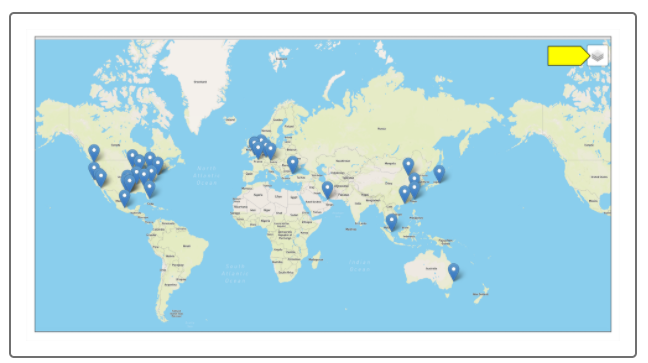

When we hover over the Layers Control, the map options are shown.

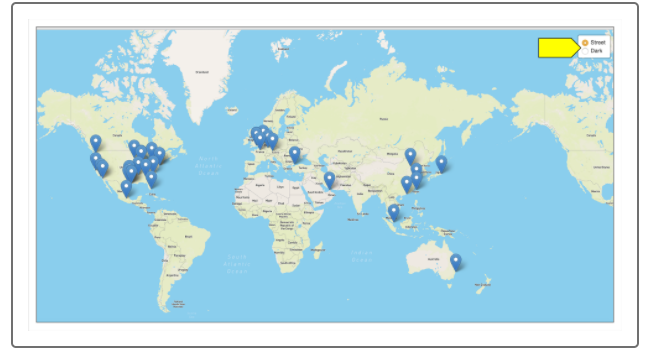